#### Модель, которая умеет делать прогноз стоимости жилья в Калифорнии по его характеристикам: площадь, число комнат, население района и т.д.

In [2]:
from sklearn.datasets import fetch_california_housing # для загрузки данных
import pandas as pd # дла работы с таблицами
import matplotlib.pyplot as plt
import seaborn as sns

### Шаг 1. Загрузка датасета

In [7]:

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Описание признаков California Housing

| Признак        | Описание                                                  |
|----------------|-----------------------------------------------------------|
| `MedInc`       | Медианный доход в районе (в десятках тысяч $)             |
| `HouseAge`     | Средний возраст домов в районе                            |
| `AveRooms`     | Среднее число комнат на дом                               |
| `AveBedrms`    | Среднее число спален на дом                               |
| `Population`   | Население района                                          |
| `AveOccup`     | Среднее число жильцов на дом                              |
| `Latitude`     | Географическая широта района                              |
| `Longitude`    | Географическая долгота района                             |
| `MedHouseVal`  | **Целевая переменная** — медианная стоимость дома ($100k) |

### Шаг 2. Изучение данных

In [ ]:
print(df.shape) # возвращает кортеж (число_строк, число_столбцов)
print(df.info()) # возвращает информацию о dataFrame (имена столбцов, кол-во ненулевых, нулевых столбцов, тип данных, объем памяти)
print(df.describe()) 

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333

#### Визуализация целевой переменной

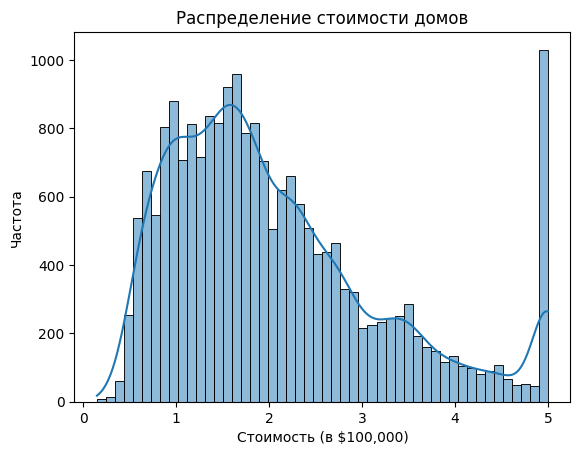

In [15]:
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость (в $100,000)')
plt.ylabel('Частота')
plt.show()

`sns.histplot(...)` — функция из библиотеки Seaborn, которая строит гистограмму (histogram).
1. массив цен на жилье
2. разбивает значения на 50 промежутков
3. добавляет сглаженную кривую плотности распределения (KDE - kernel density estimation). Она помогает понять форму распределения



#### Корреляция

**Корреляция** — это мера того, насколько линейно связаны две переменные.

| Значение | Интерпретация                  |
| -------- | ------------------------------ |
| `+1.0`   | идеальная прямая зависимость   |
| `0.0`    | нет линейной зависимости       |
| `-1.0`   | идеальная обратная зависимость |

Пример: если доход выше → цена дома выше ⇒ высокая положительная корреляция.

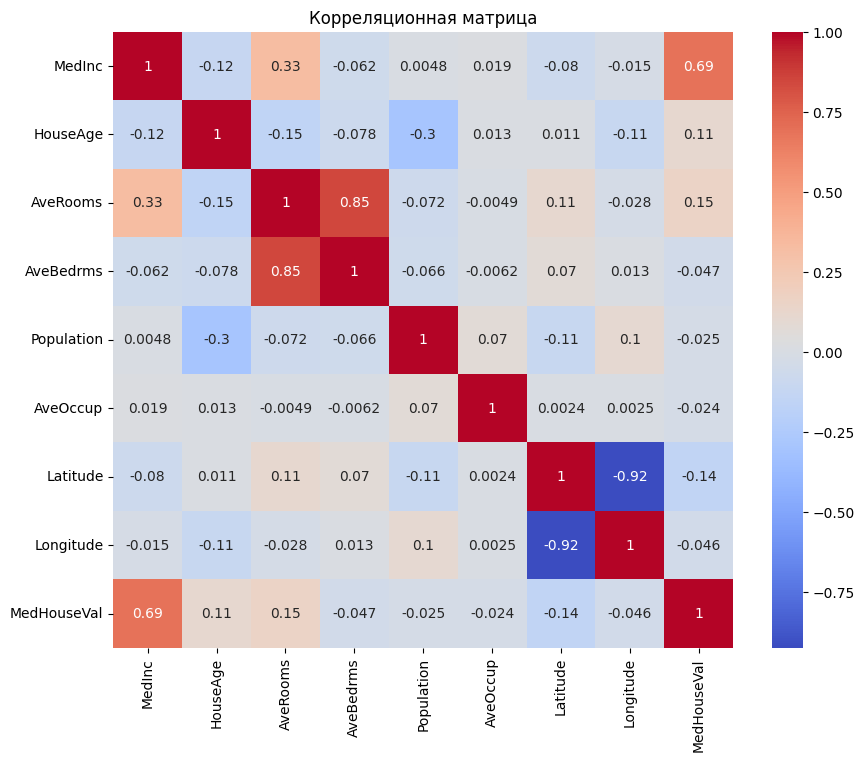

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

`df.corr()` — вычисляет корреляционную матрицу между всеми числовыми столбцами в датафрейме `df`.
Результат — таблица (матрица), в которой каждая ячейка `[i][j]` показывает насколько сильно связаны переменные `i` и `j`.

`sns.heatmap()` — рисует тепловую карту (heatmap) по числовой матрице

`annot=True` — показывает числа внутри ячеек
`cmap='coolwarm'` — цветовая схема:
- синие = отрицательная корреляция
- красные = положительная корреляция
- белое ≈ 0

**Зачем использовать корреляцию?**

- Чтобы найти признаки, которые больше всего влияют на целевую переменную
- Чтобы удалить лишние признаки (если два признака сильно коррелируют между собой)
- Чтобы понять структуру данных перед построением модели

### Шаг 3. Подготовка данных

In [29]:
from sklearn.model_selection import train_test_split

features = df.drop('MedHouseVal', axis=1) # axis = 0 (удаляет строку), axis = 1 (удаляет столбец)
labels = df['MedHouseVal']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, train_size=0.8)

In [30]:
print(len(features_train))
print(len(features_test))
print(len(labels_train))
print(len(labels_test))

print(type(features_train))  # должно быть <class 'pandas.core.frame.DataFrame'>
print(type(labels_train))  # должно быть <class 'pandas.core.series.Series'>

16512
4128
16512
4128
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Шаг 4. Обучение модели

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(features_train, labels_train)

LinearRegression()

`fit()` - обучение модели: подбирает коэффициенты (веса) для признаков, которые минимизируют ошибку

### Шаг 5. Оценка модели

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

labels_pred = model.predict(features_test)

mse = mean_squared_error(labels_test, labels_pred)
rmse = np.sqrt(mse)
r2 = r2_score(labels_test, labels_pred)

print(f"RMSE: {rmse:.3f}") # показывает среднюю реальную ошибку, интерпретируемая (если 0.7, то это означает, что погрешность модели ~ $70.000)
print(f"R^2: {r2:.3f}") # показывает, насколько хорошо модель объясняет данные

RMSE: 0.719
R^2: 0.621


### Шаг 6. Визуализация результатов

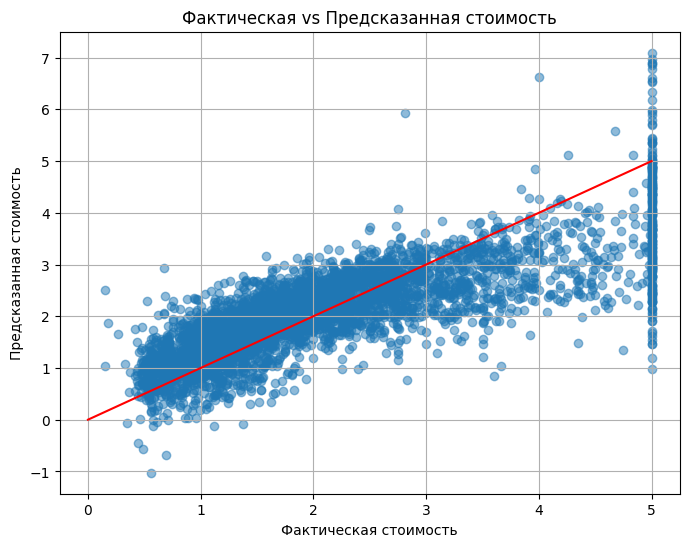

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(labels_test, labels_pred, alpha=0.5) # alpha - делает точки полупрозрачными
plt.plot([0, 5], [0, 5], color='red') # линия идеальных предсказаний
plt.xlabel('Фактическая стоимость')
plt.ylabel('Предсказанная стоимость')
plt.title('Фактическая vs Предсказанная стоимость')
plt.grid(True)
plt.show()

`plt.scatter(y_test, y_pred, alpha=0.5)`

Строит точечный график:
- `y_test` — фактические значения (ось X)
- `y_pred` — предсказания модели (ось Y)
- `alpha=0.5` — делает точки полупрозрачными (удобно, когда их много)
  
📌 В идеале, все точки должны лежать на линии `y = x` — это значит, что предсказания совпадают с реальностью.

`plt.plot([0, 5], [0, 5], color='red')`

Рисует красную диагональ от (0, 0) до (5, 5):
- Это и есть "идеальная линия" — если модель предсказала абсолютно точно, точка окажется на этой линии.
- Отклонения от линии = ошибки модели.